In [1]:
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

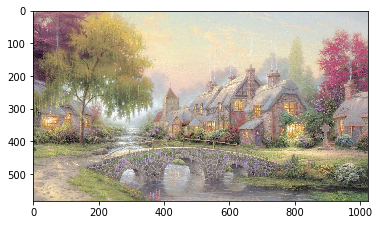

In [2]:
image = plt.imread('./欧式.jpg')
plt.imshow(image)

In [3]:
image.shape

(582, 1024, 3)

(1, 582, 1024, 1)


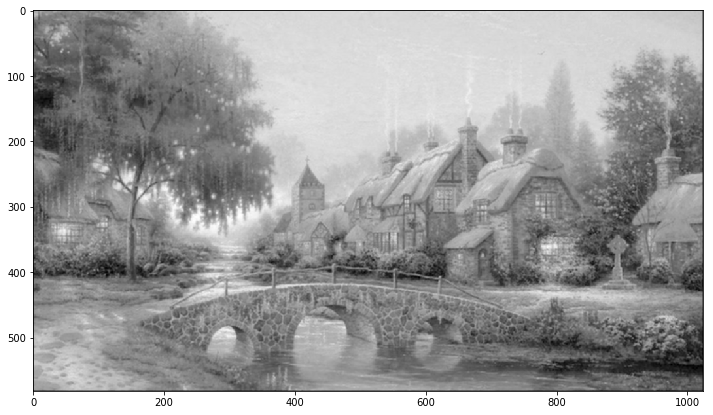

In [4]:
# [filter_height, filter_width, in_channels, out_channels]
filter_ = np.full(shape = [3,3,3,1],fill_value=1/27).reshape(3,3,3,1) 

conv = tf.nn.conv2d(input = image.reshape(1,582,1024,3).astype(np.float32),filter=filter_,strides=[1,1,1,1],padding="SAME")

with tf.Session() as sess:
    ret = sess.run(conv)
    print(ret.shape)
    
    plt.figure(figsize=(12,9))
    plt.imshow(ret.reshape(582,1024),cmap = 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 582, 1024, 3)


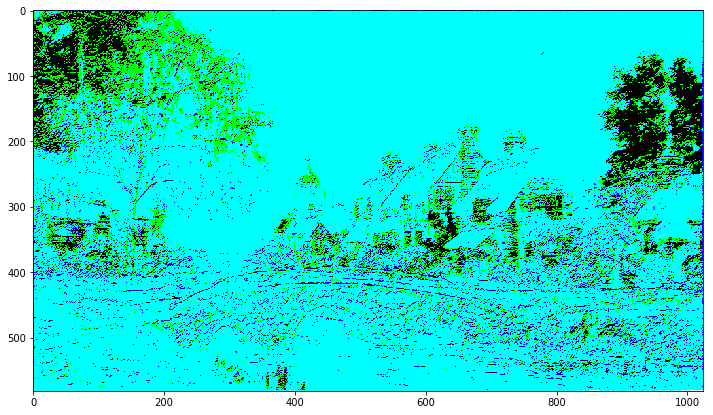

In [15]:
# [filter_height, filter_width, in_channels, out_channels]
filter_ = np.random.normal(loc=1/27,size = (3,3,3,3))

conv = tf.nn.conv2d(input = image.reshape(1,582,1024,3).astype(np.float32),filter=filter_,strides=[1,1,1,1],padding="SAME")

with tf.Session() as sess:
    ret = sess.run(conv)
    print(ret.shape)
    
    plt.figure(figsize=(12,9))
    plt.imshow(ret.reshape(582,1024,3))

In [17]:
image = np.transpose(image,axes = [2,0,1])
image.shape

(3, 582, 1024)

In [19]:
bridge = plt.imread('./欧式.jpg')[380:520,180:780]

(3, 582, 1024, 1)


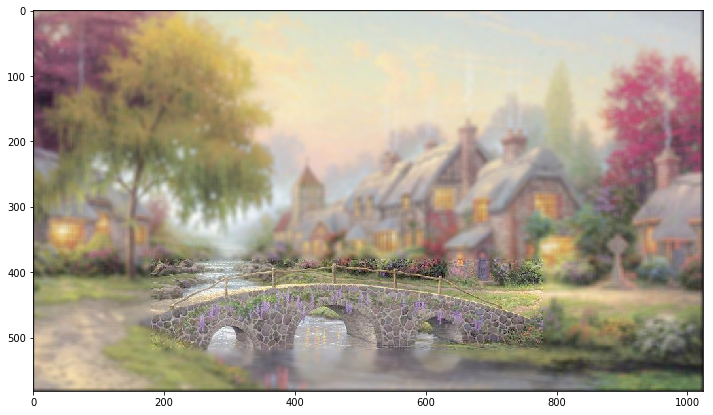

In [20]:
filter_ = np.full(shape = [8,8],fill_value=1/64).reshape(8,8,1,1)

conv = tf.nn.conv2d(input = image.reshape(3,582,1024,1).astype(np.float32),filter=filter_,strides=[1,1,1,1],padding="SAME")

with tf.Session() as sess:
    ret = sess.run(conv)
    print(ret.shape)
    
    plt.figure(figsize=(12,9))
    img = ret.reshape(3,582,1024).transpose([1,2,0]).astype(np.uint8)
    
    img[380:520,180:780] = bridge
    plt.imshow(img)